In [1]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
genres = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [3]:
x='blues'

In [4]:
pathlib.Path(f'song_features/{x}').mkdir(parents=True, exist_ok=True)  ## Creating a path to store song_features

In [5]:
genres  ## All the Labels

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [7]:
for g in genres[6:]:
    pathlib.Path(f'song_features/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'song_features/{g}/{filename[:-3].replace(".", "")}.png')

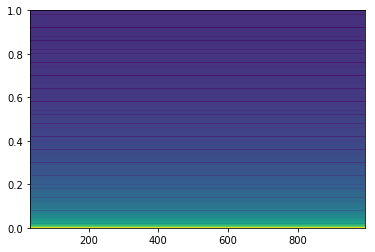

In [83]:
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, sides='default', mode='default', scale='dB');


In [11]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [12]:
header                           ## All the features present in an image that can be used to predict genre of audio data

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [13]:
file = open('data.csv', 'w', newline='')  ## Created a new csv with "data.csv" name

In [14]:
with file:                                ## Writing columns name to "data.csv"
    writer = csv.writer(file)
    writer.writerow(header)

In [15]:
for g in genres:                          ## Iterating over all the genres
    for filename in os.listdir(f'./genres/{g}'): ##Iterating over all the spectrograms to convert each spectrogram into features
        
        songname = f'./genres/{g}/{filename}'   ## Song name for first column
        song_features,sampling_rate = librosa.load(songname,mono=True,duration=30)     #Loading song to Librosa                    
        
        chroma_stft = librosa.feature.chroma_stft(y=song_features,sr=sampling_rate)    #Chroma Short-Time Fourier Transform
        rmse = librosa.feature.rmse(y=song_features)                                   #RMSE 
        spectral_centroid = librosa.feature.spectral_centroid(y=song_features,sr=sampling_rate)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=song_features,sr=sampling_rate)
        rolloff = librosa.feature.spectral_rolloff(y=song_features,sr=sampling_rate)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=song_features)
        mfcc = librosa.feature.mfcc(y=song_features,sr=sampling_rate)
        
        
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spectral_centroid)} {np.mean(spectral_bandwidth)} {np.mean(rolloff)} {np.mean(zero_crossing_rate)}'
        for mfcc_i in mfcc:
             to_append += f' {np.mean(mfcc_i)}'
        to_append += f' {g}'
        
        
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [16]:
df = pd.read_csv('data.csv')  ## Read the feature dataframe

In [84]:
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.351991,0.079469,2008.581132,2106.617024,4254.215942,0.089267,-153.632304,109.857258,-23.085707,59.040677,...,12.350816,-12.306271,5.780973,-10.279924,1.791489,-13.304210,2.473193,-6.717573,-1.189238,rock
996,0.398653,0.076452,2006.051164,2068.327905,4147.374921,0.097659,-142.424217,116.219780,-32.177077,49.122974,...,14.065346,-16.394693,4.152589,-4.350760,3.736455,-10.845639,1.875218,-7.459579,-2.802677,rock
997,0.432103,0.081617,2077.190361,1926.989678,4030.767293,0.121824,-125.031313,115.194965,-47.993506,52.834532,...,10.481961,-17.951917,1.211113,-11.534863,1.844773,-12.847902,3.447424,-12.594178,-2.107003,rock
998,0.362349,0.083888,1398.672358,1818.148469,3014.740104,0.048731,-224.972299,123.656889,-9.754534,56.595062,...,7.683082,-10.071786,-0.255097,-5.276486,-2.816289,-4.416438,1.558265,-5.043121,-3.585596,rock


In [79]:
import seaborn as sns
corr = df.corr()


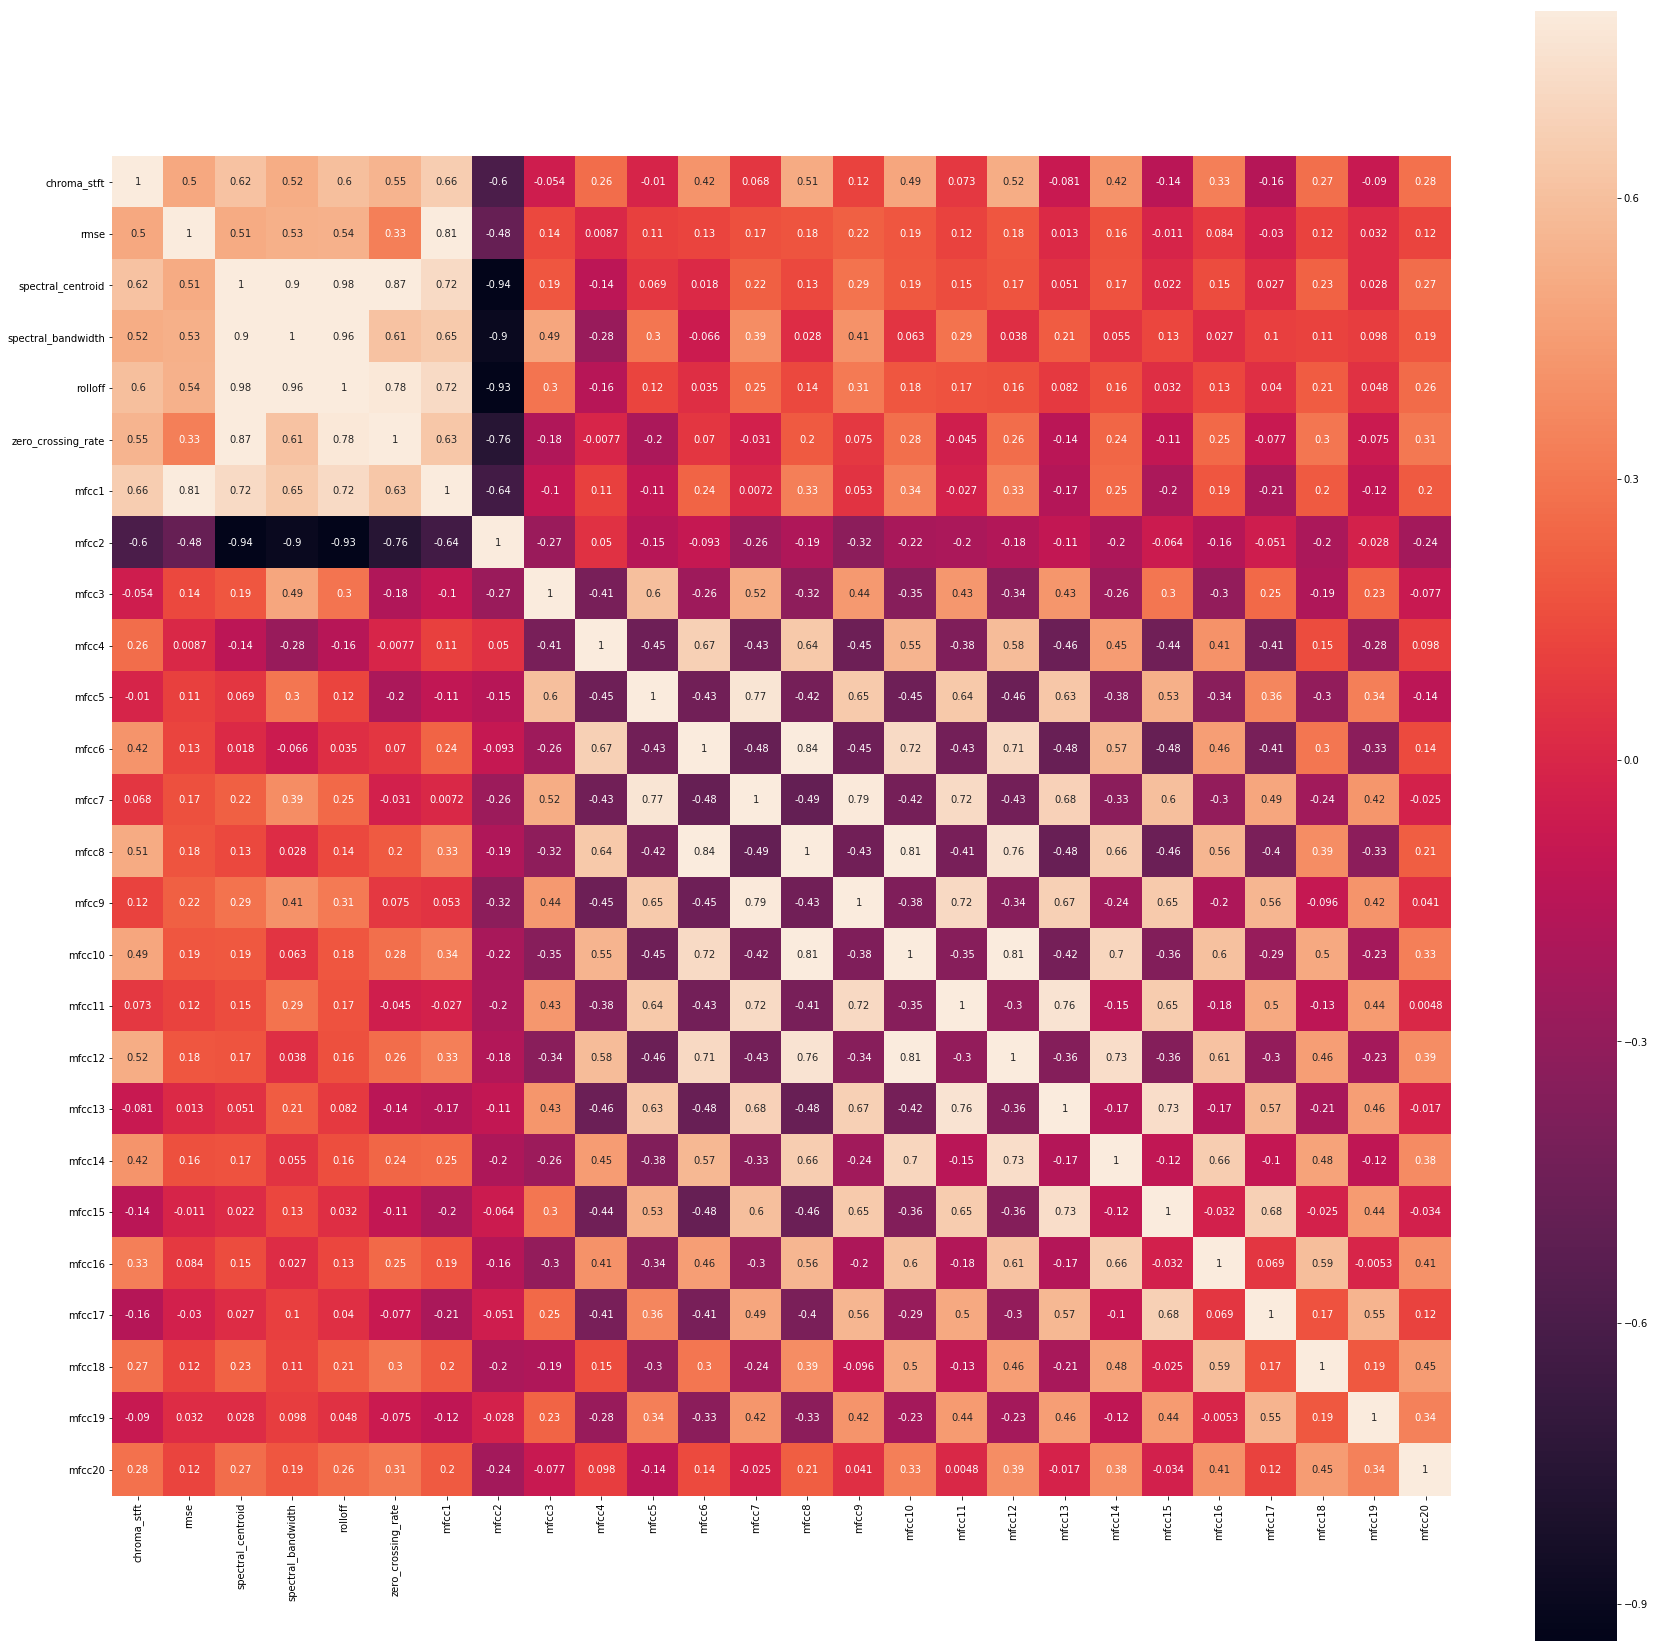

In [82]:
corr=df.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr,vmax=0.8,cbar = True , annot = True, square = True,)

In [18]:
df.drop(['filename'],axis=1,inplace=True)

In [19]:
df['label'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [20]:
genre_list = df.iloc[:, -1]
encoder = LabelEncoder()
X = df.iloc[:,:-1]
y = encoder.fit_transform(genre_list)

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(df.iloc[:, :-1], dtype = float))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

## Applying machine Learning Algorithms

## Logistic Regression

In [23]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression


In [24]:
Logist = LogisticRegression(penalty='l2')
Logist.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = Logist.predict(X_test)
print("accuracy = " + str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

accuracy = 0.59
              precision    recall  f1-score   support

           0       0.43      0.56      0.49        18
           1       0.79      0.96      0.87        24
           2       0.55      0.32      0.40        19
           3       0.64      0.45      0.53        20
           4       0.46      0.61      0.52        18
           5       0.53      0.64      0.58        14
           6       0.72      0.75      0.73        24
           7       0.70      0.88      0.78        16
           8       0.63      0.41      0.50        29
           9       0.33      0.33      0.33        18

   micro avg       0.59      0.59      0.59       200
   macro avg       0.58      0.59      0.57       200
weighted avg       0.59      0.59      0.58       200



## Support Vector Machine

In [26]:
from sklearn import svm

In [27]:
svm_model = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = svm_model.predict(X_test)
print("accuracy = " + str(100*accuracy_score(y_test,y_pred))+"%")
print(classification_report(y_test,y_pred))

accuracy = 67.0%
              precision    recall  f1-score   support

           0       0.62      0.72      0.67        18
           1       0.85      0.96      0.90        24
           2       0.54      0.68      0.60        19
           3       0.50      0.45      0.47        20
           4       0.62      0.72      0.67        18
           5       0.69      0.64      0.67        14
           6       0.90      0.75      0.82        24
           7       0.79      0.94      0.86        16
           8       0.74      0.48      0.58        29
           9       0.39      0.39      0.39        18

   micro avg       0.67      0.67      0.67       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.68      0.67      0.67       200



## RandomForestClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
seed= 0

In [30]:
rf = RandomForestClassifier(n_estimators= 100, random_state=42,max_depth=15)

In [31]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("accuracy = " + str(100*accuracy_score(y_test,y_pred))+"%")
print(classification_report(y_test,y_pred))

accuracy = 65.5%
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.85      0.96      0.90        24
           2       0.52      0.63      0.57        19
           3       0.59      0.50      0.54        20
           4       0.52      0.61      0.56        18
           5       0.69      0.79      0.73        14
           6       0.79      0.62      0.70        24
           7       0.74      0.88      0.80        16
           8       0.75      0.62      0.68        29
           9       0.43      0.33      0.38        18

   micro avg       0.66      0.66      0.66       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.66      0.66      0.65       200



In [32]:
feature_list = df.columns[:-1]

In [33]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)] # List of tuples with variable and importance
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) #Sorted List

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: chroma_stft          Importance: 0.08
Variable: rmse                 Importance: 0.07
Variable: mfcc4                Importance: 0.06
Variable: mfcc1                Importance: 0.05
Variable: mfcc9                Importance: 0.05
Variable: spectral_centroid    Importance: 0.04
Variable: spectral_bandwidth   Importance: 0.04
Variable: rolloff              Importance: 0.04
Variable: zero_crossing_rate   Importance: 0.04
Variable: mfcc3                Importance: 0.04
Variable: mfcc6                Importance: 0.04
Variable: mfcc13               Importance: 0.04
Variable: mfcc17               Importance: 0.04
Variable: mfcc2                Importance: 0.03
Variable: mfcc5                Importance: 0.03
Variable: mfcc7                Importance: 0.03
Variable: mfcc8                Importance: 0.03
Variable: mfcc10               Importance: 0.03
Variable: mfcc11               Importance: 0.03
Variable: mfcc12               Importance: 0.03
Variable: mfcc14               Importanc

In [34]:
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [70]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = ['auto', 'sqrt']                                              # Number of features to consider at every split

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]                                               # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4]                                                 # Minimum number of samples required at each leaf node
bootstrap = [True, False]                                                    # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200,
                  1300,
                  1400,
                  1500,
                  1600,
                  1700,
                  1800,
                  1900,
                  2000]}


In [71]:
rf = RandomForestClassifier()

In [72]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=4, verbose=2,random_state=42,n_jobs=-1,n_iter=100,scoring='neg_mean_absolute_error')

In [73]:
rf_random.fit(X_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  9.4min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          ret

In [74]:
rf_random.best_params_


{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1800}

In [75]:
rf_random.cv_results_

{'mean_fit_time': array([ 3.29070038,  5.73017848,  1.28655893,  2.18665576,  8.40452528,
         6.69060892,  7.66550189,  9.79106909,  1.59423786,  4.25512171,
         3.8818723 ,  7.674977  ,  1.83583999,  5.41153008,  3.95143306,
         2.89151776,  1.46857297,  5.19288856,  7.41292769,  3.69661784,
         6.55472046,  1.53290051,  5.39307672,  2.24150336,  7.91334057,
         0.54952866,  4.84828514, 10.22939324,  6.92747617,  1.72912568,
         4.13161606,  3.62380964,  5.91917574, 10.00374985,  2.94163311,
         0.42635977, 10.28200543,  4.86324531,  2.99025625,  7.66325843,
         2.60852432,  1.63462478,  1.37357628,  5.4185105 , 12.84593296,
        14.51244432,  5.49081767,  0.59166718,  2.35494828,  3.77739805,
         8.93361127,  9.94740045,  2.51976198,  2.25945777,  8.59875679,
         2.95160717,  1.63387948,  4.84155357,  2.46565676,  9.78084582,
         4.62712687,  8.30828255, 13.6442638 ,  3.07253247,  2.91569895,
         3.34356034,  1.62440687, 

In [76]:
rf = RandomForestClassifier(n_estimators=1800,bootstrap=False,max_depth=80,max_features='auto',min_samples_leaf=1,min_samples_split=2)

In [77]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("accuracy = " + str(100*accuracy_score(y_test,y_pred))+"%")
print(classification_report(y_test,y_pred))

accuracy = 63.0%
              precision    recall  f1-score   support

           0       0.55      0.61      0.58        18
           1       0.85      0.92      0.88        24
           2       0.48      0.58      0.52        19
           3       0.58      0.35      0.44        20
           4       0.43      0.67      0.52        18
           5       0.56      0.71      0.63        14
           6       0.84      0.67      0.74        24
           7       0.72      0.81      0.76        16
           8       0.77      0.59      0.67        29
           9       0.50      0.39      0.44        18

   micro avg       0.63      0.63      0.63       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.65      0.63      0.63       200

